In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
data = load_iris()

In [3]:
X = data.data
y = data.target

In [4]:
ss = ShuffleSplit(n_splits=1,
                             train_size=0.5,
                             test_size=0.5,
                             random_state=0)

In [7]:
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [9]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
clf.score(X_train, y_train)

0.92000000000000004

In [11]:
clf.score(X_test, y_test)

0.83999999999999997

In [15]:
ss = ShuffleSplit(n_splits=10,
                             train_size=0.5,
                             test_size=0.5,
                             random_state=0)
scores = []
for train_index, test_index in ss.split(X):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

scores = np.array(scores)

In [16]:
print(scores)

[ 0.84        0.93333333  0.90666667  1.          0.90666667  0.93333333
  0.94666667  1.          0.90666667  0.88      ]


In [18]:
scores.mean()

0.92533333333333334

In [19]:
scores.std()

0.047027178902795737

In [21]:
train_sizes = np.arange(0.1, 1.0, 0.1)

In [26]:
all_mean = []
all_std = []

for train_size in train_sizes:
    ss = ShuffleSplit(n_splits=100, test_size=1-train_size, train_size=train_size, random_state=0)
    scores = []
    for train_index, test_index in ss.split(X):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
    
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))

    scores = np.array(scores)
    all_mean.append(scores.mean())
    all_std.append(scores.std())

In [28]:
all_mean, all_std

([0.75207407407407401,
  0.84091666666666653,
  0.89371428571428579,
  0.91888888888888898,
  0.93066666666666675,
  0.9415,
  0.94733333333333336,
  0.95800000000000007,
  0.96066666666666678],
 [0.10916043239196151,
  0.10133206550741972,
  0.062982846889193353,
  0.046626967240793973,
  0.03836665218650176,
  0.033374557841432298,
  0.035922412963029358,
  0.037303559556100742,
  0.054238157949710805])

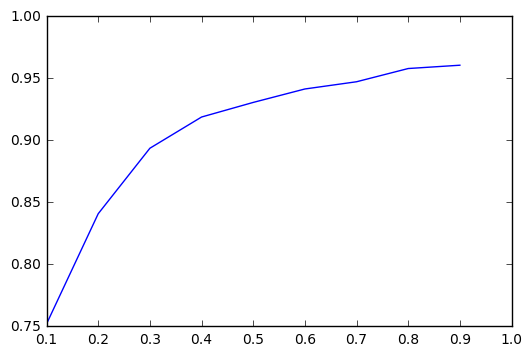

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_sizes, all_mean)


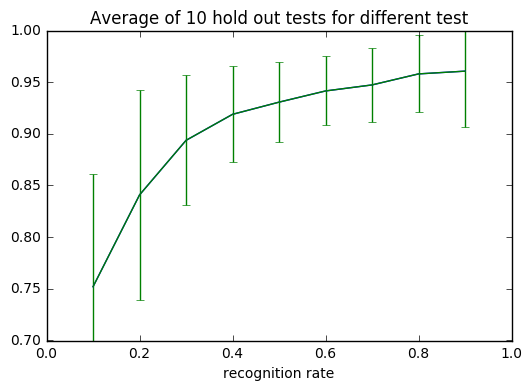

In [39]:
plt.plot(train_sizes, all_mean)
plt.ylim(0.7, 1)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel('training size [%]')
plt.xlabel('recognition rate')
plt.title('Average of 10 hold out tests for different test')

In [41]:
ss = ShuffleSplit(n_splits=10,
                             train_size=0.5,
                             test_size=0.5,
                             random_state=0)
for x  in ss.split(X):
    print(x)

(array([  3, 149,  98,   6,  68, 109,  96,  12, 102, 120, 104, 128,  46,
        11, 110, 124,  41, 148,   1, 113, 139,  42,   4, 129,  17,  38,
         5,  53, 143, 105,   0,  34,  28,  55,  75,  35,  23,  74,  31,
       118,  57, 131,  65,  32, 138,  14, 122,  19,  29, 130,  49, 136,
        99,  82,  79, 115, 145,  72,  77,  25,  81, 140, 142,  39,  58,
        88,  70,  87,  36,  21,   9, 103,  67, 117,  47]), array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52]))
(array([101,  29,  81,  20,  46,  51,  53,  23,  27,   2,  28,  37, 111,
        10,  84, 137, 127,  43,  87,  69, 144, 140,  35,  76,   3,  82,
       145, 116,